In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_train_org = pd.read_csv('house_price_train.csv')
house_df_test_org = pd.read_csv('house_price_test.csv')
house_df_org = pd.concat([house_df_train_org,house_df_test_org])
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0


In [2]:
house_df_ohe = pd.get_dummies(house_df)
print(house_df_ohe.shape)

(2919, 290)


In [3]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

## EDA

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [5]:
isnull_series = house_df.isnull().sum()
print(isnull_series[isnull_series > 0].sort_values(ascending=False))

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64


In [6]:
#Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)


#드롭하지 않은 숫자형 Null 칼럼은 평균값으로 대체
house_df.fillna(house_df.mean(), inplace=True)

isnull_series = house_df.isnull().sum()
print(isnull_series[isnull_series > 0].sort_values(ascending=False))

GarageCond      159
GarageQual      159
GarageFinish    159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MSZoning          4
Functional        2
Utilities         2
KitchenQual       1
Electrical        1
Exterior2nd       1
Exterior1st       1
SaleType          1
dtype: int64


<AxesSubplot:xlabel='SalePrice'>

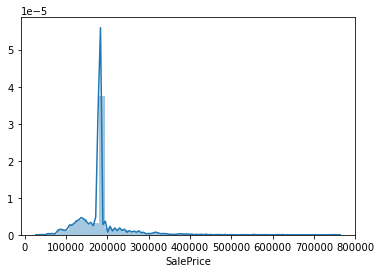

In [7]:
sns.distplot(house_df['SalePrice'])

<AxesSubplot:xlabel='SalePrice'>

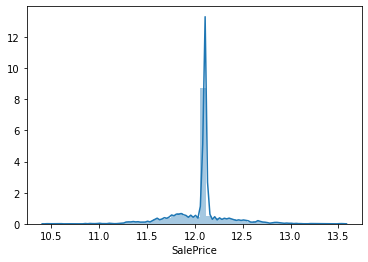

In [8]:
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [9]:
#SalePrice 로그 변환
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [10]:
house_df_ohe = pd.get_dummies(house_df)

isnull_series = house_df_ohe.isnull().sum()
print(isnull_series[isnull_series > 0].sort_values(ascending=False))

Series([], dtype: int64)


In [11]:
house_df_ohe.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.390118,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005422,-0.064302,-0.072520,...,0.001218,-0.040736,-0.018118,0.039911,0.003719,0.011253,0.037366,-0.023187,0.027341,-0.045302
LotFrontage,-0.390118,1.000000,0.364382,0.204190,-0.068350,0.116905,0.085608,0.202210,0.203603,0.041396,...,-0.041038,0.114645,-0.003890,-0.084007,0.002206,-0.046903,0.007403,0.015590,-0.082070,0.112441
LotArea,-0.201730,0.364382,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125354,0.194021,0.084055,...,-0.015732,0.031601,-0.004067,-0.014035,-0.014771,-0.020429,0.024241,0.017927,-0.022898,0.033434
OverallQual,0.033638,0.204190,0.100541,1.000000,-0.093847,0.597554,0.571532,0.430961,0.281704,-0.042755,...,-0.045148,0.338330,-0.052783,-0.194091,-0.127006,-0.049636,-0.040738,-0.023605,-0.134282,0.333192
OverallCond,-0.065625,-0.068350,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.135752,-0.050403,0.041489,...,-0.014818,-0.148122,-0.018578,0.162551,-0.060231,-0.051836,-0.025736,-0.032058,0.168425,-0.143560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.011253,-0.046903,-0.020429,-0.049636,-0.051836,-0.077741,-0.078213,-0.018629,-0.028073,-0.018833,...,-0.003368,-0.019187,-0.003150,0.025380,-0.016953,1.000000,-0.005850,-0.008130,-0.138487,-0.019448
SaleCondition_Alloca,0.037366,0.007403,0.024241,-0.040738,-0.025736,-0.025116,-0.034022,-0.017984,0.026104,-0.026690,...,-0.004773,-0.027190,-0.004464,0.035967,-0.024025,-0.005850,1.000000,-0.011521,-0.196256,-0.027560
SaleCondition_Family,-0.023187,0.015590,0.017927,-0.023605,-0.032058,-0.036093,-0.049794,-0.017978,-0.026233,-0.001997,...,0.045983,-0.037787,0.050036,-0.014418,-0.033388,-0.008130,-0.011521,1.000000,-0.272742,-0.038301
SaleCondition_Normal,0.027341,-0.082070,-0.022898,-0.134282,0.168425,-0.137934,-0.102889,-0.069411,-0.017694,0.068774,...,0.007156,-0.643684,-0.087334,0.620346,-0.568743,-0.138487,-0.196256,-0.272742,1.000000,-0.652444


## Model training

In [12]:
house_train = house_df_ohe[:len(house_df_train_org)]
house_test = house_df_ohe[len(house_df_train_org):]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = house_train.drop(['SalePrice'],axis=1,inplace=False)
X_test = house_test.drop(['SalePrice'],axis=1,inplace=False)
y_train = house_train['SalePrice']
y_test = house_test['SalePrice']

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 0.176 , RMSE : 0.420


In [14]:
y_target = house_train['SalePrice']
X_features = house_train.drop('SalePrice', axis=1, inplace=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 0.017 , RMSE : 0.132


In [15]:
y_target = house_train['SalePrice']
X_features = house_train.drop('SalePrice', axis=1, inplace=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 0.017 , RMSE : 0.129


In [16]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_features.columns )
coeff.sort_values(ascending=False)

RoofMatl_WdShngl    0.5
RoofMatl_Roll       0.4
RoofMatl_Metal      0.4
RoofMatl_CompShg    0.4
RoofMatl_WdShake    0.3
                   ... 
Electrical_FuseP   -0.2
MSZoning_C (all)   -0.3
Functional_Maj2    -0.4
Condition2_PosN    -0.7
RoofMatl_ClyTile   -2.4
Length: 270, dtype: float64

In [17]:
SalePrice_corr = house_train.corr()['SalePrice']
print(SalePrice_corr[(SalePrice_corr < 0.01) & (SalePrice_corr > -0.01)].sort_values(ascending=False))

RoofMatl_Tar&Grv     0.009607
Foundation_Wood      0.008912
Condition2_RRAe      0.008571
RoofStyle_Mansard    0.005801
GarageCond_Gd        0.005239
RoofMatl_Metal       0.005026
LotConfig_FR2        0.004883
BsmtFinSF2           0.004832
LotConfig_Corner     0.003985
SaleType_ConLI       0.003058
BsmtFinType2_GLQ     0.002345
RoofMatl_ClyTile    -0.002696
BsmtHalfBath        -0.005149
Name: SalePrice, dtype: float64


In [18]:
house_train_copy = house_train.copy()
house_train_copy.drop('RoofMatl_ClyTile', axis=1, inplace=True)
y_target = house_train_copy['SalePrice']
X_features = house_train_copy.drop('SalePrice', axis=1, inplace=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 0.036 , RMSE : 0.190


In [19]:
house_train_copy = house_train.copy()
house_train_copy.drop(['BsmtHalfBath', 'BsmtFinType2_GLQ','SaleType_ConLI', 'LotConfig_Corner', 'BsmtFinSF2','LotConfig_FR2'], axis=1, inplace=True)
y_target = house_train_copy['SalePrice']
X_features = house_train_copy.drop('SalePrice', axis=1, inplace=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 0.017 , RMSE : 0.129


In [20]:
house_train_copy.drop('RoofMatl_Metal', axis=1, inplace=True)
y_target = house_train_copy['SalePrice']
X_features = house_train_copy.drop('SalePrice', axis=1, inplace=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 0.016 , RMSE : 0.126


In [21]:
house_train_copy.drop('GarageCond_Gd', axis=1, inplace=True)
y_target = house_train_copy['SalePrice']
X_features = house_train_copy.drop('SalePrice', axis=1, inplace=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 0.016 , RMSE : 0.126


In [22]:
house_train_copy.drop('RoofStyle_Mansard', axis=1, inplace=True)
y_target = house_train_copy['SalePrice']
X_features = house_train_copy.drop('SalePrice', axis=1, inplace=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 0.016 , RMSE : 0.126


In [23]:
house_train_copy.drop('Condition2_RRAe', axis=1, inplace=True)
y_target = house_train_copy['SalePrice']
X_features = house_train_copy.drop('SalePrice', axis=1, inplace=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))


MSE : 0.016 , RMSE : 0.127


In [24]:
house_train_copy.drop('Foundation_Wood', axis=1, inplace=True)
y_target = house_train_copy['SalePrice']
X_features = house_train_copy.drop('SalePrice', axis=1, inplace=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 0.016 , RMSE : 0.127


In [25]:
house_train_copy.drop('RoofMatl_Tar&Grv', axis=1, inplace=True)
y_target = house_train_copy['SalePrice']
X_features = house_train_copy.drop('SalePrice', axis=1, inplace=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 0.016 , RMSE : 0.128


In [27]:
house_train.drop(['BsmtHalfBath', 'BsmtFinType2_GLQ','SaleType_ConLI', 'LotConfig_Corner', 'BsmtFinSF2','LotConfig_FR2', 'RoofMatl_Metal', 'GarageCond_Gd', 'RoofStyle_Mansard', 'Foundation_Wood'], axis=1, inplace=True)
y_target = house_train['SalePrice']
X_features = house_train.drop('SalePrice', axis=1, inplace=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_valid)
mse = mean_squared_error(y_valid, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 0.016 , RMSE : 0.126
